# Summer School of Data Science - Split '17

# 1. Introduction to Machine Learning with TensorFlow

This hands-on session serves as an introductory course for essential TensorFlow usage and basic machine learning with TensorFlow. This notebook is partly based on and follow the approach of chapter 6 of the book "Deep Learning" by Ian Goodfellow, Yoshua Bengio and Aaron Courville, available at: http://www.deeplearningbook.org/.

Other useful tutorials exist in the form of Jupyter notebooks, some of which are:
- https://github.com/udacity/deep-learning
- https://github.com/DataScienceUB/DeepLearningfromScratch

This notebook covers basic TensorFlow usage concepts, which are then applied to elementary machine learning models like linear and logistic regression, and finally a simple multilayer perceptron is built and trained using the established TensorFlow concepts.

## Basic TensorFlow concepts

TensorFlow is an open source Python library which provides multiple APIs for buidling and evaluating computational graphs. These graphs can be used to represent any machine learning model, and TensorFlow provides methods for efficient optimization and evaluation of the models. The programmer's guide for TensorFlow can be found at https://www.tensorflow.org/programmers_guide/, and the full documentation is availale at https://www.tensorflow.org/api_docs/python/.

The import statement for TensorFlow programs is: `import tensorflow as tf`. This provides access to all TensorFlow APIs, classes, methods and symbols. 

In [1]:
import tensorflow as tf

### Tensor

The basic concept behind TensorFlow is the tensor - an n-dimensional array of a base datatype. In TensorFlow it is represented by the `tf.Tensor` object which will produce a value when evaluated. A `tf.Tensor` object has a shape (which defines the structure of the elements) and a data type, shared by all the elements in the Tensor. The main types of tensors are:
- Constant
- Variable
- Placeholder

The [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant) method creates a constant tensor, populated with values of a data type, specified by arguments `value`, `shape` (optional), [`dtype`](https://www.tensorflow.org/api_docs/python/tf/DType) (optional).

In [2]:
# create a TensorFlow constant tensor
t = tf.constant(1)
print(t)

Tensor("Const:0", shape=(), dtype=int32)


In [3]:
# create a TensorFlow constant of a specific data type and shape
t = tf.constant(5, shape=[2,2], dtype=tf.uint16)
print(t)

Tensor("Const_1:0", shape=(2, 2), dtype=uint16)


However, any Tensor is only evaluated within a [`Session`](https://www.tensorflow.org/api_docs/python/tf/Session), which is the environment in which all tensors and operations are executed.

In [4]:
# create a TensorFlow session and evaluate the created constant
sess = tf.Session()
print(sess.run(t))

[[5 5]
 [5 5]]


Other very common and useful methods for creating tensors of constant value are [`tf.zeros()`](https://www.tensorflow.org/api_docs/python/tf/zeros) and [`tf.ones()`](https://www.tensorflow.org/api_docs/python/tf/ones).

In [5]:
# create a tensor of any shape populated with zeros and check within the session
t = tf.zeros([3,3,2])
print(sess.run(t))

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


In [6]:
# create a tensor of any shape populated with ones and check within the session
t = tf.ones([3,3,3])
print(sess.run(t))

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


Tensors containing random values from various distribution can be created using a number of methods, with the most commonly used being [`tf.random_uniform()`](https://www.tensorflow.org/api_docs/python/tf/random_uniform) and [`tf.random_normal()`](https://www.tensorflow.org/api_docs/python/tf/random_normal).

In [7]:
# create a random tensor containing values from a uniform distribution between 10 and 20
t = tf.random_uniform([5,8,4], minval=10, maxval=20)
print(t)
print(sess.run(t))

Tensor("random_uniform:0", shape=(5, 8, 4), dtype=float32)
[[[19.530043  12.137991  16.23591   13.067066 ]
  [10.49487   18.403133  14.167137  10.590769 ]
  [19.317493  16.006138  15.951186  19.777813 ]
  [18.563477  18.088436  12.577815  16.073353 ]
  [19.263084  15.151481  14.59257   18.874626 ]
  [16.283997  12.446671  15.331055  13.871831 ]
  [14.346515  12.705448  13.686092  18.481962 ]
  [19.11493   12.699369  16.867943  17.451569 ]]

 [[15.814377  13.614002  12.366094  17.761784 ]
  [17.30607   19.668957  14.71362   16.692436 ]
  [13.071975  18.843262  14.61377   18.913675 ]
  [14.539312  18.04301   16.430363  16.400133 ]
  [11.887876  13.546528  10.054802  13.073392 ]
  [12.326675  18.409075  16.331818  13.580154 ]
  [17.111021  17.006718  12.523685  11.617077 ]
  [14.626135  16.609287  13.749296  14.3450775]]

 [[14.610911  11.898506  13.813564  11.008964 ]
  [17.11029   16.499117  12.395107  17.74867  ]
  [12.325026  13.870867  15.246405  14.840965 ]
  [17.904211  19.817423  

Simple algebraic operations such as `+`,`-`,`/`,and `*` can be used with tensors in this form, or by calling [`tf.add()`](https://www.tensorflow.org/api_docs/python/tf/add), [`tf.subtract()`](https://www.tensorflow.org/api_docs/python/tf/subtract), [`tf.divide()`](https://www.tensorflow.org/api_docs/python/tf/divide), or [`tf.multiply()`](https://www.tensorflow.org/api_docs/python/tf/multiply). These are all element-wise, and defined for tensors of equal shapes and data-types. Tensors can be cast into a specific data type by calling [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast).

In [8]:
# add a scalar to a tensor
a = tf.ones([3,2])
sess.run(a+3)

array([[4., 4.],
       [4., 4.],
       [4., 4.]], dtype=float32)

In [9]:
# subtract two tensors
a = tf.constant(4., shape=[2,3])
print(a)
b = tf.random_normal(shape=[2,3])
print(b)
sess.run(a-b)

Tensor("Const_2:0", shape=(2, 3), dtype=float32)
Tensor("random_normal:0", shape=(2, 3), dtype=float32)


array([[5.763013 , 4.6212482, 4.941102 ],
       [4.75669  , 4.689145 , 5.6189394]], dtype=float32)

In [10]:
# divide two integer tensors
a = tf.constant(4, shape=[2,3])
b = tf.constant(7, shape=[2,3])
print(sess.run(a/b))

[[0.57142857 0.57142857 0.57142857]
 [0.57142857 0.57142857 0.57142857]]


Other very useful operations include:
- Absolute value (modulus) - [`tf.abs()`](https://www.tensorflow.org/api_docs/python/tf/abs)
- Exponentiation with $e$ - [`tf.exp()`](https://www.tensorflow.org/api_docs/python/tf/exp)
- Square and other powers - [`tf.square()`](https://www.tensorflow.org/api_docs/python/tf/square) and [`tf.pow()`](https://www.tensorflow.org/api_docs/python/tf/pow)
- Matrix multiplication - [`tf.matmul()`](https://www.tensorflow.org/api_docs/python/tf/matmul)
- Transpose - [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose)

In [11]:
# try out varied mathematical operations with various tensors
a = tf.exp(tf.random_normal(shape=[3,2]))
print(sess.run(a))
b = tf.matmul(a,tf.transpose(a))
print(sess.run(b))

[[1.4862592  0.15734188]
 [0.7713699  0.53794986]
 [0.37073866 0.08915564]]
[[4.277684   4.2514105  1.2238425 ]
 [4.2514105  4.2877874  1.3866731 ]
 [1.2238425  1.3866731  0.81450915]]


### Placeholders and Variables

Placeholders and Vairables are special kinds of tensors which are the essential building blocks of more complex data and computation streams. These are the most commonly used types of tensors in TensorFlow. 

A [Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) is a tensor which acts like a "promise" to provide a value at the evaluation of the computational graph. Placeholders are mostly used as input points in the computational graph where data will be provided. It will produce an error when evaluated, unless the value is fed to the session.

In [12]:
# create a placeholder and feed it a value in a session
a = tf.placeholder(dtype=tf.float32)
b = tf.exp(a)
print(b)
print(sess.run(b,feed_dict={a:5}))

# create two placeholders and a tensor implementing matrix multiplication 
x1 = tf.placeholder(dtype=tf.float32)
x2 = tf.placeholder(dtype=tf.float32)
y = tf.matmul(x1, x2)
print(sess.run(y,feed_dict={x1:[[1,2],[3,4]], x2:[[5,6],[7,8]]}))

Tensor("Exp_1:0", dtype=float32)
148.41316
[[19. 22.]
 [43. 50.]]


A [Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) is a tensor which allows the addition of trainable parameters to the computational graph. Constants are intialized when created, as opposed to variables, which need to be initialized within the session (and the initialization procedure must be defined). Variables can be "manually" assigned a new value using [`tf.assign`](https://www.tensorflow.org/api_docs/python/tf/assign), and their state is kept within the session object. This is mostly used for model training, during which variables are changed within the optimization process. 

In [13]:
# create a variable, initialize it, and assign a new value within a session
sess = tf.Session()
a = tf.Variable(5)
print(a)
sess.run(tf.global_variables_initializer())
sess.run(a)
sess.run(tf.assign(a,6))
print(sess.run(a))

sess.close()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(a))


<tf.Variable 'Variable:0' shape=() dtype=int32_ref>
6
5


## Linear regression in TensorFlow

Linear regression is one of the simplest and most commonly used regression models. The multivariate linear regression can be written as: 

$$y = w^{T}x + b$$

where $y \in \mathbb{R}$ is the output, $w \in \mathbb{R}^{p}$ is a column vector containing $p$ weights for $p$ features in $x \in \mathbb{R}^{p}$, and $b \in \mathbb{R}$ is the bias. The parameters contained in $w$ and $b$ are also called coefficients and are trained by using a gradient descent algorithm.


### Exercise:

Let us build a univariate linear regression model for a simple problem, using the previously introduced TensorFlow concepts:
- The model input $x$ is a placeholder for data
- The trainable model parameters $w$ and $b$ are defined as TensorFlow Variables
- The model output $\hat{y}$ is a Tensor
- The obesrved output $y$ is also a placeholder, where data will be provided for training purpose

In [14]:
#define placeholders for data
x = tf.placeholder(dtype=tf.float32, shape=[None])
y = tf.placeholder(dtype=tf.float32, shape=[None])
#define model parameters as variables
w = tf.Variable(tf.random_normal(shape=()))
b = tf.Variable(tf.random_normal([]))
#create a tensor which calculates the model output
y_model = w*x+b

To train a model built in TensorFlow, a loss function needs to be defined, most commonly as a [reduction](https://www.tensorflow.org/api_guides/python/math_ops#Reduction) operation. An [optimizer](https://www.tensorflow.org/api_guides/python/train#Optimizers) object needs to be defined, and the [`minimize()`](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer#minimize) method called in order to update the variables defined within the model to minimize the selected loss function. When creating optimizer objects, choices about the learning rate have to be made - these, in combination with the number of training epochs, can greatly influence the model training process. With the approapriate learning rate, the optimization can quickly converge.

In [15]:
#define the loss function as the mean of all squared errors (MSE)
loss = tf.reduce_mean(tf.square(y_model-y))
#create a gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.1)
#create a train operation
train = optimizer.minimize(loss)

#generate data to train the regression
import numpy as np
x_train = np.random.normal(size=100)
y_train = 5*x_train + 10 + np.random.normal(size=100)
print(x_train, y_train)

#initialize variables, run 100 epochs of training algorithm
sess.run(tf.global_variables_initializer())
for epoch in range(100):
    sess.run(train, {y:y_train, x:x_train})
    print('w:',sess.run(w),'b:',sess.run(b),', loss:',sess.run(loss,{y:y_train,x:x_train}))

[ 0.80394379 -1.99279296 -1.09058065 -1.26860829  0.22374494  0.41630087
 -0.13966037 -1.20592597 -1.09975041  0.90347568 -0.59694416  0.67580985
  1.15043926  0.60426145 -1.02363104  1.05937404  1.15585276 -1.5044422
  0.91346162  0.65232906  1.14843526  1.9540888  -0.22731419  0.03829183
 -0.71246662 -0.14786709 -1.7563641   0.48687119 -0.6459113   1.50272491
 -0.0684773  -1.18261108  0.34057124 -0.47418668 -0.44692319 -0.3103657
  0.57510515  1.25108811 -0.5014007   2.27916725  0.28564919  0.95669503
 -0.35868595 -0.13036063  0.84695589  0.34109795 -0.80551442  1.197276
  0.26928256 -0.01209219  0.64517043 -0.27482477  0.00479932  1.40990356
  0.24178984 -1.29629284  0.30397775  0.80028614 -1.31979146  0.66751894
 -0.04259364  0.50513453 -1.1873546  -0.74197899  0.70392003  0.02667755
 -0.29211509 -0.96758811 -0.97158535 -0.3667167  -0.69013917  1.02865067
 -0.92655205  0.21323248 -1.3534503   0.24593794  1.73480366 -1.19879257
  2.29102304 -0.08411143 -1.03122606  0.31570413 -0.232

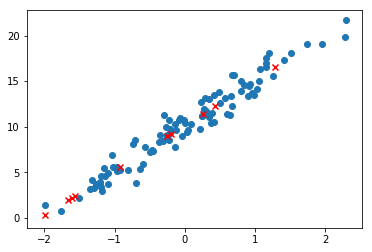

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)

x_test = np.random.normal(size=10)
y_test = sess.run(y_model, feed_dict={x:x_test})
plt.scatter(x_test, y_test, marker='x', c='r')

## Logistic Regression

Logistic regression is a very common and simple linear model for classification purposes, based on linear regression and the logistic function:

$$y = \frac{1}{1+e^{-(w^{T}x + b)}}$$

Due to the nature of the logistic function, it produces output values in the range $[0,1]$, thus providing a probability for each class given in the output. Similar to linear regression, the variables defined within the logistic regression model are parameters trainable by various optimization algorithms.

Let us build a logistic regression for the well-known XOR problem.

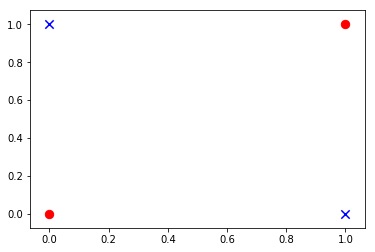

In [17]:
#generate XOR training data
import numpy as np
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

#import matplotlib for visualization
%matplotlib inline
import matplotlib.pyplot as plt

#logical indices of data where the outputs are 1 and 0
t = np.where(y_train==1)[0]
f = np.where(y_train==0)[0]

#scatter plot of the data
plt.scatter(x_train[t,0],x_train[t,1],c='b',marker='x',s=70)
plt.scatter(x_train[f,0],x_train[f,1],c='r',marker='o',s=70)

### Exercise:
- The model input $x$ is a placeholder for a data
- The trainable model parameters $w$ and $b$ are defined as TensorFlow Variables
- The model output $\hat{y}$ is a Tensor
- The obesrved output $y$ is also a placeholder, where output data will be provided in order to train the model

In [18]:
#define placeholders for the data
x = tf.placeholder(dtype=tf.float32,shape=[None,2])
y = tf.placeholder(dtype=tf.float32,shape=[None,1])

#define variables for the trainable parameters of the model
w = tf.Variable(tf.random_normal([2,1]),name="weights")
b = tf.Variable(tf.random_normal([1]), name="bias")

#create a tensor to calculate the model output
y_model = 1/(1+tf.exp(-(tf.matmul(x,w) + b)))

#define the loss function, create the optimizer and the training operation
loss = tf.reduce_mean(tf.square(y_model-y))
optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(loss)

#train the model
sess.run(tf.global_variables_initializer())

for epoch in range(1000):
    sess.run(train,{x:x_train,y:y_train})
    print('w:',sess.run(w,{y:y_train,x:x_train}),', b:',sess.run(b,{y:y_train,x:x_train}),', loss:',sess.run(loss,{y:y_train,x:x_train}))


w: [[ 0.8442402]
 [-0.8894716]] , b: [0.16577817] , loss: 0.27470914
w: [[ 0.83227056]
 [-0.88706297]] , b: [0.15586211] , loss: 0.2738984
w: [[ 0.8206684 ]
 [-0.88449794]] , b: [0.14638546] , loss: 0.2731414
w: [[ 0.809425 ]
 [-0.8817809]] , b: [0.13733688] , loss: 0.2724346
w: [[ 0.79853106]
 [-0.8789166 ]] , b: [0.12870446] , loss: 0.27177456
w: [[ 0.7879767 ]
 [-0.87591004]] , b: [0.12047581] , loss: 0.27115783
w: [[ 0.77775156]
 [-0.8727664 ]] , b: [0.11263825] , loss: 0.2705813
w: [[ 0.7678451 ]
 [-0.86949086]] , b: [0.10517886] , loss: 0.27004185
w: [[ 0.7582464 ]
 [-0.86608887]] , b: [0.09808459] , loss: 0.2695366
w: [[ 0.7489447]
 [-0.8625658]] , b: [0.09134237] , loss: 0.26906285
w: [[ 0.73992884]
 [-0.85892713]] , b: [0.08493914] , loss: 0.26861802
w: [[ 0.731188 ]
 [-0.8551782]] , b: [0.07886197] , loss: 0.26819974
w: [[ 0.72271127]
 [-0.8513243 ]] , b: [0.07309807] , loss: 0.2678058
w: [[ 0.7144879]
 [-0.8473708]] , b: [0.06763483] , loss: 0.26743412
w: [[ 0.7065074 ]
 [-0

 [-0.29122055]] , b: [0.00401597] , loss: 0.25218982
w: [[ 0.23917586]
 [-0.2885419 ]] , b: [0.00412379] , loss: 0.2521514
w: [[ 0.23709805]
 [-0.28588685]] , b: [0.00422901] , loss: 0.2521136
w: [[ 0.2350354]
 [-0.2832552]] , b: [0.00433168] , loss: 0.25207645
w: [[ 0.23298787]
 [-0.28064677]] , b: [0.00443182] , loss: 0.25203994
w: [[ 0.23095538]
 [-0.27806142]] , b: [0.00452946] , loss: 0.25200403
w: [[ 0.2289379]
 [-0.275499 ]] , b: [0.00462464] , loss: 0.2519687
w: [[ 0.22693536]
 [-0.2729593 ]] , b: [0.00471737] , loss: 0.25193393
w: [[ 0.22494774]
 [-0.2704422 ]] , b: [0.00480771] , loss: 0.25189975
w: [[ 0.22297496]
 [-0.2679475 ]] , b: [0.00489568] , loss: 0.2518662
w: [[ 0.22101697]
 [-0.26547503]] , b: [0.00498131] , loss: 0.25183314
w: [[ 0.21907374]
 [-0.26302466]] , b: [0.00506466] , loss: 0.25180063
w: [[ 0.21714519]
 [-0.26059622]] , b: [0.00514574] , loss: 0.25176868
w: [[ 0.21523127]
 [-0.25818953]] , b: [0.00522458] , loss: 0.2517373
w: [[ 0.21333191]
 [-0.25580442]]

 [-0.07637235]] , b: [0.00579881] , loss: 0.2501542
w: [[ 0.06301136]
 [-0.07566972]] , b: [0.00577493] , loss: 0.2501513
w: [[ 0.0624101 ]
 [-0.07497365]] , b: [0.005751] , loss: 0.2501485
w: [[ 0.06181441]
 [-0.07428408]] , b: [0.00572703] , loss: 0.25014576
w: [[ 0.06122423]
 [-0.07360095]] , b: [0.00570301] , loss: 0.25014305
w: [[ 0.06063952]
 [-0.0729242 ]] , b: [0.00567896] , loss: 0.2501404
w: [[ 0.06006022]
 [-0.07225377]] , b: [0.00565487] , loss: 0.25013778
w: [[ 0.0594863]
 [-0.0715896]] , b: [0.00563075] , loss: 0.25013524
w: [[ 0.0589177 ]
 [-0.07093164]] , b: [0.00560661] , loss: 0.25013274
w: [[ 0.05835438]
 [-0.07027981]] , b: [0.00558243] , loss: 0.25013024
w: [[ 0.0577963 ]
 [-0.06963407]] , b: [0.00555824] , loss: 0.25012782
w: [[ 0.0572434 ]
 [-0.06899436]] , b: [0.00553404] , loss: 0.25012547
w: [[ 0.05669563]
 [-0.06836062]] , b: [0.00550981] , loss: 0.2501231
w: [[ 0.05615296]
 [-0.0677328 ]] , b: [0.00548558] , loss: 0.25012085
w: [[ 0.05561534]
 [-0.06711082]]

w: [[ 0.01998777]
 [-0.02567662]] , b: [0.00318688] , loss: 0.25001657
w: [[ 0.01979152]
 [-0.0254447 ]] , b: [0.00316923] , loss: 0.25001624
w: [[ 0.01959714]
 [-0.02521491]] , b: [0.00315167] , loss: 0.25001597
w: [[ 0.01940462]
 [-0.02498724]] , b: [0.00313418] , loss: 0.25001565
w: [[ 0.01921396]
 [-0.02476166]] , b: [0.00311678] , loss: 0.25001535
w: [[ 0.01902512]
 [-0.02453815]] , b: [0.00309946] , loss: 0.25001505
w: [[ 0.0188381 ]
 [-0.02431669]] , b: [0.00308223] , loss: 0.25001478
w: [[ 0.01865287]
 [-0.02409727]] , b: [0.00306508] , loss: 0.2500145
w: [[ 0.01846942]
 [-0.02387986]] , b: [0.00304801] , loss: 0.25001425
w: [[ 0.01828773]
 [-0.02366446]] , b: [0.00303102] , loss: 0.250014
w: [[ 0.01810778]
 [-0.02345103]] , b: [0.00301411] , loss: 0.25001374
w: [[ 0.01792956]
 [-0.02323956]] , b: [0.00299729] , loss: 0.25001347
w: [[ 0.01775306]
 [-0.02303002]] , b: [0.00298055] , loss: 0.25001323
w: [[ 0.01757825]
 [-0.02282241]] , b: [0.00296389] , loss: 0.250013
w: [[ 0.017

w: [[ 0.00455162]
 [-0.00687994]] , b: [0.00136935] , loss: 0.25000107
w: [[ 0.00450494]
 [-0.00681943]] , b: [0.00136136] , loss: 0.25000107
w: [[ 0.00445873]
 [-0.00675946]] , b: [0.00135342] , loss: 0.25000104
w: [[ 0.00441296]
 [-0.00670003]] , b: [0.00134551] , loss: 0.250001
w: [[ 0.00436765]
 [-0.00664113]] , b: [0.00133766] , loss: 0.250001
w: [[ 0.00432279]
 [-0.00658277]] , b: [0.00132984] , loss: 0.25000098
w: [[ 0.00427837]
 [-0.00652493]] , b: [0.00132208] , loss: 0.25000095
w: [[ 0.00423439]
 [-0.00646761]] , b: [0.00131437] , loss: 0.25000095
w: [[ 0.00419085]
 [-0.0064108 ]] , b: [0.0013067] , loss: 0.25000092
w: [[ 0.00414774]
 [-0.0063545 ]] , b: [0.00129907] , loss: 0.2500009
w: [[ 0.00410505]
 [-0.00629872]] , b: [0.00129149] , loss: 0.25000086
w: [[ 0.00406278]
 [-0.00624342]] , b: [0.00128395] , loss: 0.25000086
w: [[ 0.00402093]
 [-0.00618864]] , b: [0.00127645] , loss: 0.25000086
w: [[ 0.0039795 ]
 [-0.00613434]] , b: [0.001269] , loss: 0.2500008
w: [[ 0.0039384

w: [[ 0.00117956]
 [-0.00227593]] , b: [0.0006492] , loss: 0.25000006
w: [[ 0.0011666]
 [-0.0022565]] , b: [0.00064539] , loss: 0.25000012
w: [[ 0.00115376]
 [-0.00223724]] , b: [0.0006416] , loss: 0.2500001
w: [[ 0.00114106]
 [-0.00221815]] , b: [0.00063783] , loss: 0.2500001
w: [[ 0.00112848]
 [-0.00219923]] , b: [0.00063408] , loss: 0.2500001
w: [[ 0.00111604]
 [-0.00218047]] , b: [0.00063035] , loss: 0.2500001
w: [[ 0.00110372]
 [-0.00216188]] , b: [0.00062665] , loss: 0.2500001
w: [[ 0.00109153]
 [-0.00214346]] , b: [0.00062296] , loss: 0.2500001
w: [[ 0.00107946]
 [-0.00212519]] , b: [0.0006193] , loss: 0.2500001
w: [[ 0.00106752]
 [-0.00210709]] , b: [0.00061566] , loss: 0.2500001
w: [[ 0.0010557 ]
 [-0.00208914]] , b: [0.00061204] , loss: 0.2500001
w: [[ 0.001044  ]
 [-0.00207135]] , b: [0.00060844] , loss: 0.25000006
w: [[ 0.00103243]
 [-0.00205371]] , b: [0.00060487] , loss: 0.2500001
w: [[ 0.00102097]
 [-0.00203623]] , b: [0.00060132] , loss: 0.25000006
w: [[ 0.00100963]
 [-

w: [[ 0.00024375]
 [-0.00074345]] , b: [0.00029637] , loss: 0.25
w: [[ 0.00024059]
 [-0.00073735]] , b: [0.00029463] , loss: 0.25
w: [[ 0.00023747]
 [-0.0007313 ]] , b: [0.00029289] , loss: 0.24999997
w: [[ 0.00023438]
 [-0.00072531]] , b: [0.00029117] , loss: 0.25
w: [[ 0.00023133]
 [-0.00071936]] , b: [0.00028946] , loss: 0.25
w: [[ 0.00022831]
 [-0.00071347]] , b: [0.00028776] , loss: 0.25
w: [[ 0.00022532]
 [-0.00070763]] , b: [0.00028607] , loss: 0.25
w: [[ 0.00022237]
 [-0.00070183]] , b: [0.00028439] , loss: 0.24999999
w: [[ 0.00021944]
 [-0.00069609]] , b: [0.00028271] , loss: 0.24999999
w: [[ 0.00021656]
 [-0.00069039]] , b: [0.00028105] , loss: 0.25000003
w: [[ 0.0002137 ]
 [-0.00068475]] , b: [0.0002794] , loss: 0.24999999
w: [[ 0.00021087]
 [-0.00067915]] , b: [0.00027775] , loss: 0.25
w: [[ 0.00020808]
 [-0.0006736 ]] , b: [0.00027612] , loss: 0.25000003
w: [[ 0.00020531]
 [-0.0006681 ]] , b: [0.00027449] , loss: 0.24999999
w: [[ 0.00020258]
 [-0.00066265]] , b: [0.0002728

 [-2.2853269e-04]] , b: [0.00012446] , loss: 0.25
w: [[ 1.8127246e-05]
 [-2.2675573e-04]] , b: [0.00012373] , loss: 0.25
w: [[ 1.7593040e-05]
 [-2.2499441e-04]] , b: [0.000123] , loss: 0.25
w: [[ 1.7066657e-05]
 [-2.2324650e-04]] , b: [0.00012228] , loss: 0.25
w: [[ 1.6548096e-05]
 [-2.2151424e-04]] , b: [0.00012156] , loss: 0.25
w: [[ 1.6035123e-05]
 [-2.1979540e-04]] , b: [0.00012084] , loss: 0.25
w: [[ 1.5529973e-05]
 [-2.1808996e-04]] , b: [0.00012013] , loss: 0.25
w: [[ 1.5033765e-05]
 [-2.1639570e-04]] , b: [0.00011943] , loss: 0.24999999
w: [[ 1.4544262e-05]
 [-2.1471485e-04]] , b: [0.00011873] , loss: 0.24999999
w: [[ 1.4061464e-05]
 [-2.1304740e-04]] , b: [0.00011803] , loss: 0.24999999
w: [[ 1.3585372e-05]
 [-2.1139337e-04]] , b: [0.00011734] , loss: 0.24999999
w: [[ 1.3115985e-05]
 [-2.0975276e-04]] , b: [0.00011666] , loss: 0.24999999
w: [[ 1.2652186e-05]
 [-2.0812555e-04]] , b: [0.00011598] , loss: 0.24999999
w: [[ 1.2196211e-05]
 [-2.0651176e-04]] , b: [0.00011529] , loss

Inspect the trained model parameters and the model outputs. What is the minimum found by the optimizer?

In [19]:
print(sess.run(y_model, {x:x_train}))

[[0.50002503]
 [0.49998212]
 [0.50002575]
 [0.49998283]]


## Multilayer Perceptron

A multilayer perceptron is a feedforward network that can be thought of a model composed of multiple nested functions, for instance:

$$y = f^{(3)}(f^{(2)}(f^{(1)}(x)))$$

This means that the output of each function is routed as the input of the next function, and this operational and data flow is strictly one-directional (thus "feedforward") and may contain multiple layers of nested functions (thus "deep"). TensorFlow is a very suitable tool for building and training such models. Here we will consider the XOR problem once again, and build a multilayer perceptron to classify the data correctly.

It was demonstrated previously that the XOR data are not linearly separable - this means that a non-linear layer (function) within the model is needed to tranform the problem to a linearly separable space. This is in fact the core of the multilayer perceptron as well as other deep learning models - nonlinear activation functions such as the logistic function, $tanh$, or ReLU. A comprehensive guide for TensorFlow supported functions can be found in: https://www.tensorflow.org/versions/r0.12/api_docs/python/nn/activation_functions_.

Let us build a multilayer perceptron model where the sigmoid activation function is used for the hiddern layer. Let:
- $f^{(1)}(x) = W^{(1)}x + b^{(1)}$
- $f^{(2)}(x) = {1}/({1+e^{-x}})$
- $f^{(3)}(x) = W^{(2)}x + b^{(2)}$

with $W^{(1)} \in \mathbb{R}^{2\times 2}$, $b^{(1)} \in \mathbb{R}^{2\times 1}$, $W^{(2)} \in \mathbb{R}^{2\times 1}$, and $b^{(2)} \in \mathbb{R}$. 


In [20]:
sess = tf.Session()

x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

X = tf.placeholder(tf.float32,[None,2])
y = tf.placeholder(tf.float32,[None,1])

W1 = tf.Variable(tf.random_uniform([2,2]),name="weights1")
b1 = tf.Variable(tf.random_uniform([2]), name="bias1")

W2 = tf.Variable(tf.random_uniform([2,1]),name="weights2")
b2 = tf.Variable(tf.random_uniform([1]), name="bias2")

f1 = tf.matmul(X,W1)+b1
f2 = tf.nn.sigmoid(f1)
y_model = tf.matmul(f2,W2)+b2

loss = tf.reduce_mean(tf.square(y_model-y))

optimizer = tf.train.GradientDescentOptimizer(0.35)
#optimizer = tf.train.AdamOptimizer(0.1)
train = optimizer.minimize(loss)

sess.run(tf.global_variables_initializer())

for epoch in range(1000):
    sess.run(train, feed_dict={X: x_train, y: y_train})
    print("loss:", sess.run(loss,{X: x_train, y: y_train}))


loss: 0.25615883
loss: 0.2494412
loss: 0.24754336
loss: 0.24700311
loss: 0.24683934
loss: 0.24678096
loss: 0.246752
loss: 0.24673116
loss: 0.24671263
loss: 0.2466946
loss: 0.24667674
loss: 0.24665879
loss: 0.24664077
loss: 0.24662271
loss: 0.24660455
loss: 0.2465863
loss: 0.24656795
loss: 0.24654952
loss: 0.24653098
loss: 0.24651238
loss: 0.24649367
loss: 0.2464749
loss: 0.24645603
loss: 0.24643704
loss: 0.246418
loss: 0.24639882
loss: 0.24637957
loss: 0.24636021
loss: 0.24634075
loss: 0.24632122
loss: 0.24630156
loss: 0.24628182
loss: 0.246262
loss: 0.24624206
loss: 0.24622202
loss: 0.24620184
loss: 0.2461816
loss: 0.24616128
loss: 0.24614082
loss: 0.24612029
loss: 0.24609962
loss: 0.24607886
loss: 0.24605797
loss: 0.24603704
loss: 0.24601594
loss: 0.24599475
loss: 0.24597341
loss: 0.24595204
loss: 0.24593052
loss: 0.24590886
loss: 0.2458871
loss: 0.24586526
loss: 0.24584329
loss: 0.24582116
loss: 0.24579898
loss: 0.24577667
loss: 0.24575421
loss: 0.24573165
loss: 0.24570897
loss: 0.2

loss: 0.21456593
loss: 0.21446553
loss: 0.21436515
loss: 0.21426484
loss: 0.21416458
loss: 0.21406436
loss: 0.2139642
loss: 0.2138641
loss: 0.21376404
loss: 0.21366405
loss: 0.2135641
loss: 0.2134642
loss: 0.2133644
loss: 0.21326463
loss: 0.21316496
loss: 0.21306536
loss: 0.2129658
loss: 0.21286628
loss: 0.21276689
loss: 0.2126676
loss: 0.21256828
loss: 0.21246913
loss: 0.21236998
loss: 0.21227092
loss: 0.21217196
loss: 0.21207304
loss: 0.21197423
loss: 0.21187556
loss: 0.21177682
loss: 0.21167828
loss: 0.2115798
loss: 0.21148142
loss: 0.21138309
loss: 0.21128488
loss: 0.2111867
loss: 0.21108869
loss: 0.21099079
loss: 0.21089287
loss: 0.21079515
loss: 0.21069744
loss: 0.2105999
loss: 0.21050242
loss: 0.21040505
loss: 0.21030778
loss: 0.21021059
loss: 0.21011356
loss: 0.21001658
loss: 0.20991968
loss: 0.20982291
loss: 0.20972624
loss: 0.20962971
loss: 0.20953327
loss: 0.20943692
loss: 0.20934063
loss: 0.20924458
loss: 0.2091486
loss: 0.20905274
loss: 0.2089569
loss: 0.20886123
loss: 0.2

The first layer $f^{(1)}(x) = W^{(1)}x + b^{(1)}$ is a linear transformation of the input, and thus cannot transform the XOR problem to a linearly separable space. Let us inspect the trained parameters $W^{(1)}$ and $b^{(1)}$, and the output of the first layer.  

[[3.152967  2.0491922]
 [3.1509702 2.0423133]] 

[0.6259223 1.1315306] 

[[0.6259223 1.1315306]
 [3.7768927 3.1738439]
 [3.7788892 3.1807227]
 [6.929859  5.2230363]] 



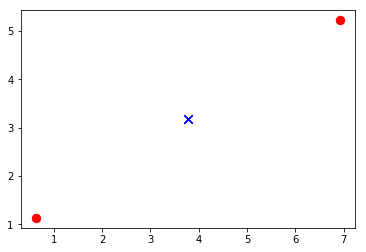

In [21]:
print(sess.run(W1),'\n')
print(sess.run(b1),'\n')

f1_out = sess.run(f1,{X: x_train, y: y_train})
print(f1_out,'\n')

plt.scatter(f1_out[t,0],f1_out[t,1],c='b',marker='x',s=70)
plt.scatter(f1_out[f,0],f1_out[f,1],c='r',marker='o',s=70)

The next layer $f^{(2)}(x)$ is the sigmoid function, which is a nonlinear transformation of the input, thus providing the possibility of transforming the problem to a new space where the outputs could be linearly separable.

[[0.6515643  0.7561213 ]
 [0.9776187  0.95983803]
 [0.9776624  0.9601023 ]
 [0.99902284 0.994638  ]]


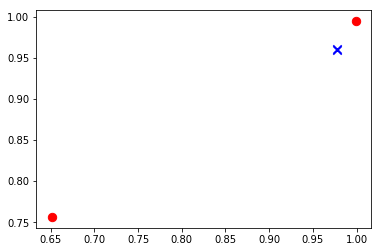

In [22]:
f2_out = sess.run(f2,{X: x_train, y: y_train})
print(f2_out)

plt.scatter(f2_out[t,0],f2_out[t,1],c='b',marker='x',s=70)
plt.scatter(f2_out[f,0],f2_out[f,1],c='r',marker='o',s=70)

The final layer is the model output:

In [23]:
print("y: ",sess.run(y,{X: x_train, y: y_train}),"\n")
print("model: ",sess.run(y_model,{X: x_train, y: y_train}))

y:  [[0.]
 [1.]
 [1.]
 [0.]] 

model:  [[0.06824267]
 [0.63072   ]
 [0.6308193 ]
 [0.66980934]]


The network seems to have learned to classify the XOR problem correctly, thanks to the multi-layered structure and the non-linear activation function in the hidden layer. This example embodies the some of the primary reasons for employing deep learning models, especially for highly non-linear problems where traditional linear approaches fail.

In [24]:
#Testing
#X = [0,1]
print("y:", sess.run(y_model, {X:[[0,0]]}))

y: [[0.06824267]]
